In [163]:
import pandas as pd 
import numpy as np,joblib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error ,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

In [88]:
#importing file
df=pd.read_excel('E:\Data_Train.xlsx')
dft=pd.read_excel('E:\Data_test.xlsx')

In [89]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [90]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [91]:
# check shape
df.shape

(12690, 9)

In [92]:
# check null
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

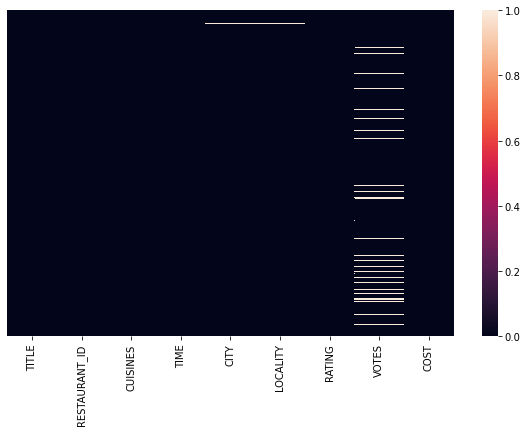

In [93]:
#Check null values with heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,)
plt.show()

Observation:null Values are present in Votes and city ,locality , Rating

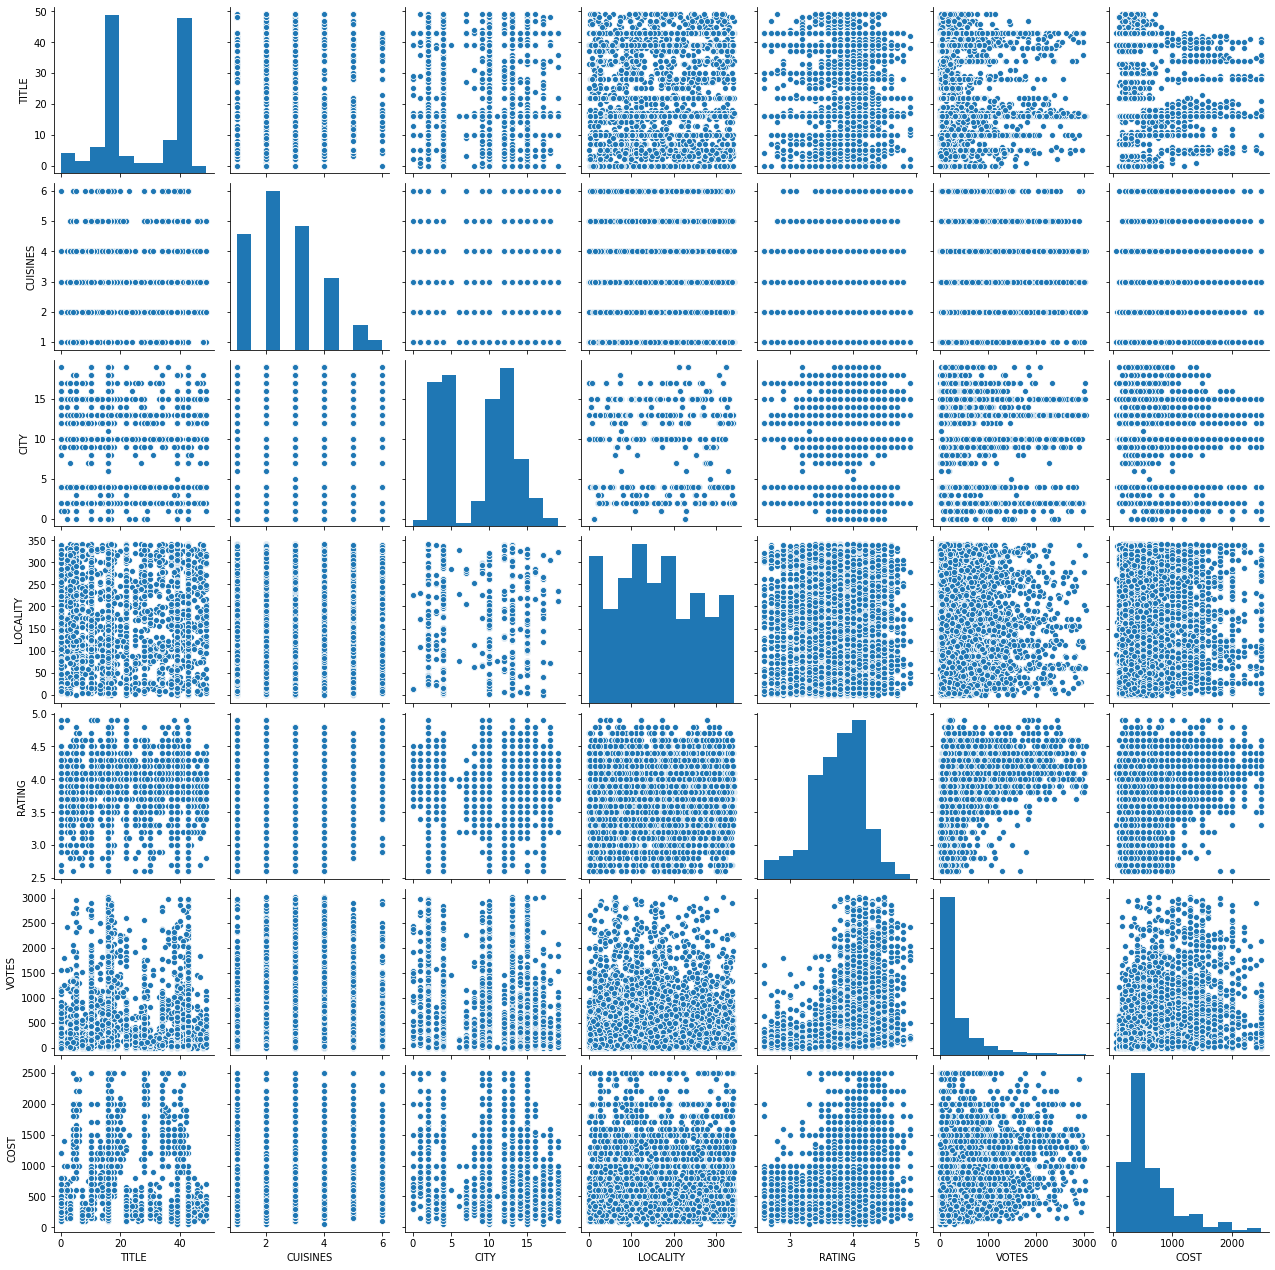

In [146]:
sns.pairplot(df)

In [94]:
# check stats
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


Observation:
    minimum food cost is 20 rs
    maximum is 14000 rs .

In [95]:
# check unique values
df['CITY'].value_counts()

Chennai                                                           2174
Bangalore                                                         2149
Hyderabad                                                         1819
Mumbai                                                            1722
New Delhi                                                         1321
                                                                  ... 
Kochi Kakkanad                                                       1
GST Road                                                             1
Amrit kaur market opposite new delhi railway station paharganj       1
Thiruvanmiyur                                                        1
Kochi Chullickal                                                     1
Name: CITY, Length: 359, dtype: int64

In [96]:
df['LOCALITY'].value_counts().head()

Gachibowli     166
Indiranagar    138
Edappally      122
Kakkanad       121
HSR            120
Name: LOCALITY, dtype: int64

In [97]:
df['VOTES'].value_counts()

44 votes      71
29 votes      66
28 votes      66
38 votes      65
35 votes      64
              ..
866 votes      1
2180 votes     1
3325 votes     1
1880 votes     1
1587 votes     1
Name: VOTES, Length: 1847, dtype: int64

In [98]:
df['TITLE'].value_counts()

QUICK BITES                     4218
CASUAL DINING                   3652
None                            1003
CAFÉ                             607
DESSERT PARLOR                   382
                                ... 
BEVERAGE SHOP,CASUAL DINING        1
CONFECTIONERY,QUICK BITES          1
DESSERT PARLOR,PAAN SHOP           1
BAKERY,CONFECTIONERY               1
CASUAL DINING,DESSERT PARLOR       1
Name: TITLE, Length: 113, dtype: int64

In [99]:
df['CUISINES'].value_counts()

South Indian                                                             532
North Indian                                                             526
North Indian, Chinese                                                    501
Fast Food                                                                286
Chinese                                                                  167
                                                                        ... 
Kerala, South Indian, Continental, Cafe                                    1
Healthy Food, Continental, Juices, Salad, Burger, Beverages, Desserts      1
Asian, Japanese, Thai, Sushi, Poké                                         1
North Indian, Desserts, BBQ                                                1
American, Parsi, Asian, North Indian                                       1
Name: CUISINES, Length: 4155, dtype: int64

In [100]:
# votes has number and object so lets make it in number.
def imput_vot(x):
    if pd.isnull(x)==True:
        return x
    else:
        return int(x[:x.find('v')].strip())

In [101]:
df['VOTES']=df.apply(lambda x : imput_vot(x['VOTES']),axis=1)

In [102]:
df.describe()

,RESTAURANT_ID,VOTES,COST
count,12690.000000,11486.000000,12690.000000
mean,7759.134121,415.668901,655.252246
std,4504.874150,842.722909,627.003540
min,0.000000,4.000000,20.000000
25%,3863.250000,57.000000,300.000000
50%,7740.000000,163.000000,500.000000
75%,11688.750000,456.750000,800.000000
max,15573.000000,41186.000000,14000.000000


Observation: Mean for votes is 415
    std is 842

In [103]:
# filling the null values
si=SimpleImputer(strategy='mean')
df['VOTES']=si.fit_transform(df['VOTES'].values.reshape(-1,1))

In [104]:
df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY             112
LOCALITY          98
RATING             2
VOTES              0
COST               0
dtype: int64

In [105]:
df=df.dropna()

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12575 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12575 non-null  object 
 1   RESTAURANT_ID  12575 non-null  int64  
 2   CUISINES       12575 non-null  object 
 3   TIME           12575 non-null  object 
 4   CITY           12575 non-null  object 
 5   LOCALITY       12575 non-null  object 
 6   RATING         12575 non-null  object 
 7   VOTES          12575 non-null  float64
 8   COST           12575 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 982.4+ KB


In [107]:
#For title we will convert same
for x in df['TITLE'].value_counts().index.tolist():
    if df[df['TITLE']==x].count()['TITLE']<10:
        df=df[df['TITLE']!=x]

In [108]:
df['TITLE'].value_counts().count()

50

In [109]:
# now we will convert it in numeric value
le=LabelEncoder()
df['TITLE']=le.fit_transform(df['TITLE'])

In [110]:
# let drop restaurant ID
df=df.drop('RESTAURANT_ID',axis=1)

In [111]:
#lets make cuisines for readable
def imput_cussin(x):
    fnd=x.count(',')
    return int(fnd+1)

In [112]:
df['CUISINES']=df.apply(lambda x : imput_cussin(x['CUISINES']),axis=1)

In [113]:
df=df.drop('TIME',axis=1)

In [114]:
for x in df['CITY'].value_counts().index.tolist():
    if df[df['CITY']==x].count()['CITY']<10:
        df=df[df['CITY']!=x]

In [115]:
for x in df['LOCALITY'].value_counts().index.tolist():
    if df[df['LOCALITY']==x].count()['LOCALITY']<10:
        df=df[df['LOCALITY']!=x]

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9940 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     9940 non-null   int32  
 1   CUISINES  9940 non-null   int64  
 2   CITY      9940 non-null   object 
 3   LOCALITY  9940 non-null   object 
 4   RATING    9940 non-null   object 
 5   VOTES     9940 non-null   float64
 6   COST      9940 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 582.4+ KB


In [117]:
df=df[df['RATING']!='NEW']

In [118]:
df['RATING'].unique()

array(['3.6', '4.2', '4.1', '3.8', '4.0', '3.9', '3.3', '3.4', '-', '4.3',
       '4.4', '2.7', '3.7', '4.7', '3.5', '3.1', '2.5', '4.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [119]:
df=df[df['RATING']!='-']

In [120]:
df['RATING']=df['RATING'].apply(lambda x : float(x))

In [121]:
df.select_dtypes('object').columns

Index(['CITY', 'LOCALITY'], dtype='object')

In [122]:
df['CITY'].nunique()

20

In [123]:
df['CITY']=le.fit_transform(df['CITY'])

In [124]:
df['LOCALITY']=le.fit_transform(df['LOCALITY'])

In [125]:
df.shape

(9017, 7)

TITLE          AxesSubplot(0.125,0.749828;0.133621x0.130172)
CUISINES    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
CITY         AxesSubplot(0.44569,0.749828;0.133621x0.130172)
LOCALITY    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
RATING      AxesSubplot(0.766379,0.749828;0.133621x0.130172)
VOTES          AxesSubplot(0.125,0.593621;0.133621x0.130172)
COST        AxesSubplot(0.285345,0.593621;0.133621x0.130172)
dtype: object

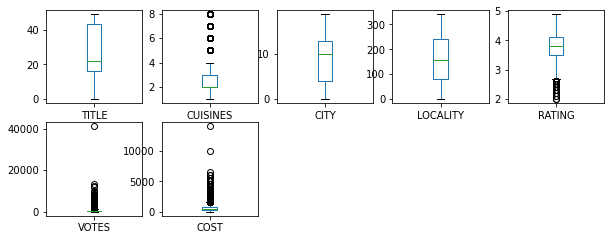

In [126]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(10,10),fontsize=10)

Observation: There are some outliers present in cusinessvotes and cost

In [127]:
zs=zscore(df)
df=df[((zs<3) & (zs>-3)).all(axis=1)]

In [128]:
df.shape

(8550, 7)

In [129]:
df.skew()

TITLE      -0.041534
CUISINES    0.632621
CITY        0.030731
LOCALITY    0.160456
RATING     -0.415987
VOTES       2.516942
COST        1.750969
dtype: float64

In [130]:
pt=PowerTransformer()

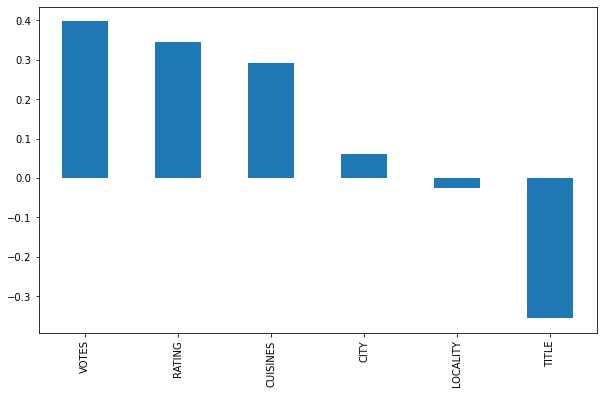

In [131]:
plt.figure(figsize=(10,6))
df.corr()['COST'].sort_values(ascending=False).drop('COST').plot(kind='bar')
plt.show()

In [132]:
scale=StandardScaler()

In [133]:
X=df.drop('COST',axis=1)
y=df['COST']

In [134]:
X=scale.fit_transform(X)

In [135]:
def model_sel(mod):
    maxscore=0
    maxstate=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        model=mod()
        model.fit(X_train,y_train)
        predict=model.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>maxscore:
            maxscore=r2score
            maxstate=x
    print("Max Score is {} at max state {}".format(maxscore,maxstate))

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=88)

In [137]:
param={'n_estimators':[100,130,150,170,190,210,230,250,270,290,310,330,350,370,390,410]}
gscv=GridSearchCV(RandomForestRegressor(),param)

In [138]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 130, 150, 170, 190, 210, 230,
                                          250, 270, 290, 310, 330, 350, 370,
                                          390, 410]})

In [139]:
gscv.best_params_

{'n_estimators': 270}

In [140]:
rf=RandomForestRegressor(n_estimators=350)
rf.fit(X_train,y_train)
predict=rf.predict(X_test)

In [141]:
r2_score(y_test,predict)

0.6758411620412804

In [142]:
mean_absolute_error(y_test,predict)

177.03225574567173

In [171]:
#Save model
filename='Restocost'
joblib.dump(rf,filename)

['Restocost']